In [1]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

**Print the top 5 rows of world dataframe.**

In [3]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


**Remove continents which have only one country in dataframe.**


In [4]:
# continents with only one country
world.groupby('continent')['name'].count().reset_index()

,continent,name
0,Africa,51
1,Antarctica,1
2,Asia,47
3,Europe,39
4,North America,18
5,Oceania,7
6,Seven seas (open ocean),1
7,South America,13


In [5]:
# remove these continents
world_clean = world[(world['continent']!='Antarctica') & (world['continent']!='Seven seas (open ocean)')]

In [6]:
world_clean.groupby('continent')['name'].count().reset_index()

,continent,name
0,Africa,51
1,Asia,47
2,Europe,39
3,North America,18
4,Oceania,7
5,South America,13


**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [7]:
# sort by population, from most to least 
world_cleanSortPop = world_clean.sort_values(by='pop_est', ascending=False)

In [8]:
# group by continent and take the first 3 largest values.. nlargest wouldn't work with groupby apply with .apply() 
world_filtered = world_cleanSortPop.groupby('continent').head(3).sort_values(by='continent', ascending=False)

In [9]:
world_clean.loc[world_clean['continent'] == 'Africa'].nlargest(n=3, columns='pop_est')

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
56,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2...."
165,105350020,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ..."
163,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.86623 22.00000, 32.90000 22.00000..."


**Print the 'world_filtered' dataframe.**

In [10]:
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.876 1.253, -67.065 1.130, -67.26..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.634 -52.636, -68.250 -53.1..."
136,4510327,Oceania,New Zealand,NZL,174800.0,"MULTIPOLYGON (((176.886 -40.066, 176.508 -40.6..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.000 -2.600, 142.735 -3.289..."
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.689 -40.808, 148.289 -40.8..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0..."
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.128 32.535, -115.991 32.612, -1..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.840 49.000, -122.974 49.0..."
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."


In [11]:
# fix iso_a3 for france
world_filtered.loc[world_filtered['name']=='France','iso_a3']='FRA'

-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

In [12]:
world_f2 = world_filtered.copy()

In [13]:
world_f2 = world_f2.rename(columns={'geometry': 'borders'}).set_geometry('borders')

<AxesSubplot:>

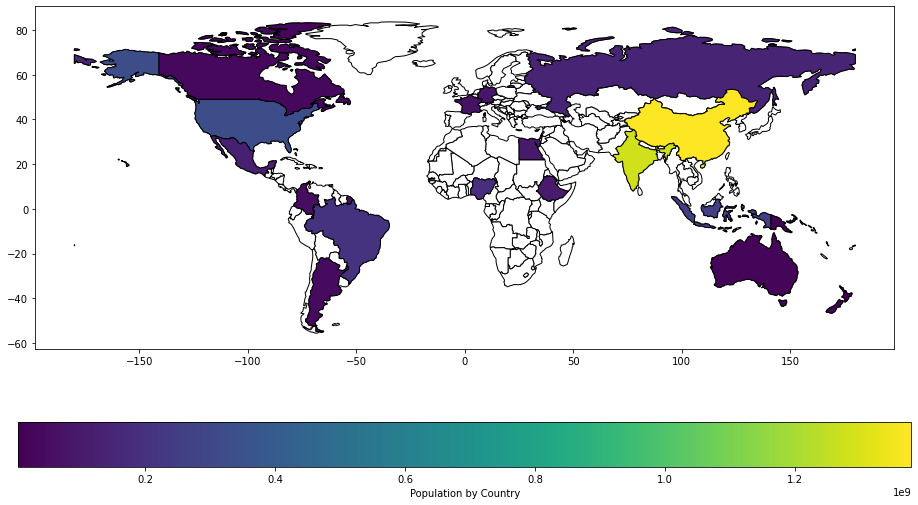

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
world_clean.plot(ax=ax, color='white', edgecolor='black')
world_filtered.plot(column='pop_est', ax=ax, legend=True, legend_kwds={'label': "Population by Country",
                         'orientation': "horizontal"}, edgecolor='black')
                 

### Plotly

In [15]:
import plotly.graph_objects as go

In [16]:
world_filtered_data = go.Choropleth(
    locations=world_filtered['iso_a3'],
    z = world_filtered['pop_est'],
    colorscale='Viridis',
    colorbar_title = "Population Estimate"
)

In [17]:
world_filtered_fig = go.Figure(data=world_filtered_data)
world_filtered_fig.show()

-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy` 
    

In [20]:
import geopy

In [39]:
# note provider needs to be set - because it is outdated
cities = gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'], provider='photon')

<AxesSubplot:>

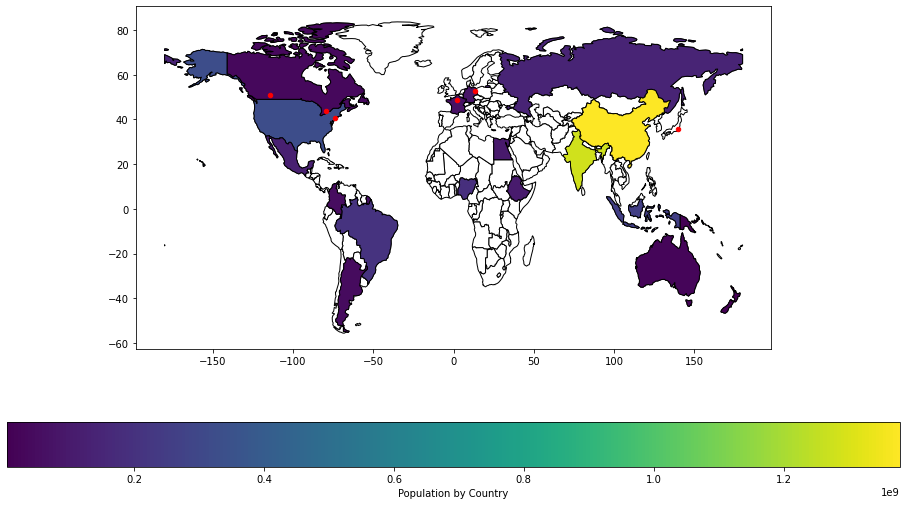

In [48]:
# get geometry

# create figure and axes
fig, ax = plt.subplots(figsize=(16,9))

# add the rest of the countries
world_clean.plot(ax=ax, color='white', edgecolor='black')

# create map from world_filtered data-frame
world_filtered.plot(column='pop_est', ax=ax, legend=True, legend_kwds={'label': "Population by Country",
                         'orientation': "horizontal"}, edgecolor='black')

# add cities
cities.plot(ax=ax ,marker='o', color='red', markersize=20)